#Libreria

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier # Algoritmo kNN para clasificación
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Dataset random

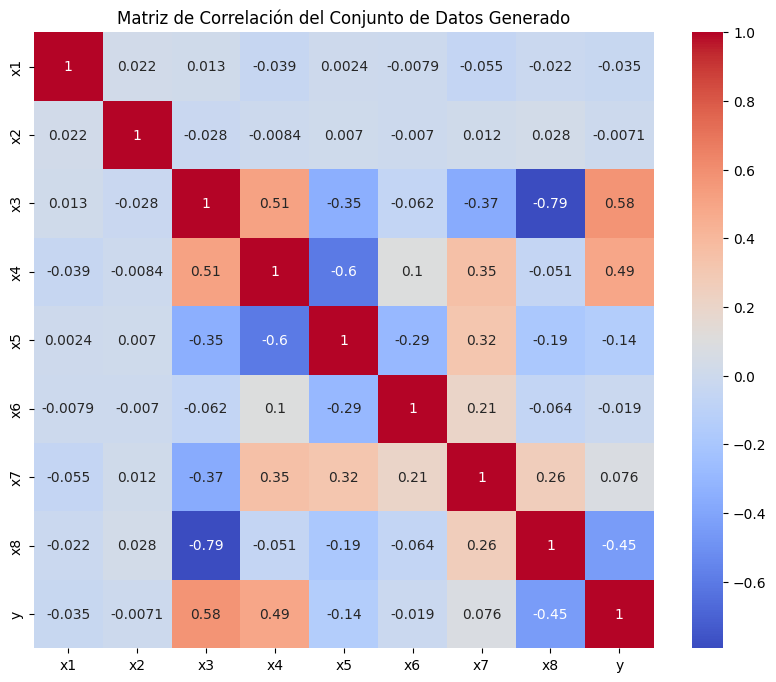

In [3]:
#Generamos el conjunto de datos de 3 clases.
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=8, n_informative=4,# caracteritristicas o columnas relacionadas con  las clases
                           n_redundant=2, n_repeated=0, n_classes=6, # Aumentamos n_redundant para crear características correlacionadas
                           n_clusters_per_class=1,
                           weights=[0.1, 0.1, 0.2, 0.2, 0.2, 0.2], # Modified weights to match n_classes
                           class_sep=1.2, random_state=34)# que tan separados estan las clases

#Creamos un DataFrame a partir del conjunto de datos, para visualizarlo
df = pd.DataFrame(data=X, columns=[f"x{i+1}" for i in range(X.shape[1])])
df['y'] = y

# Mostramos la matriz de correlación para verificar la correlación entre las características.
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación del Conjunto de Datos Generado")
plt.show()

#1. Efecto de la correlación entre variables

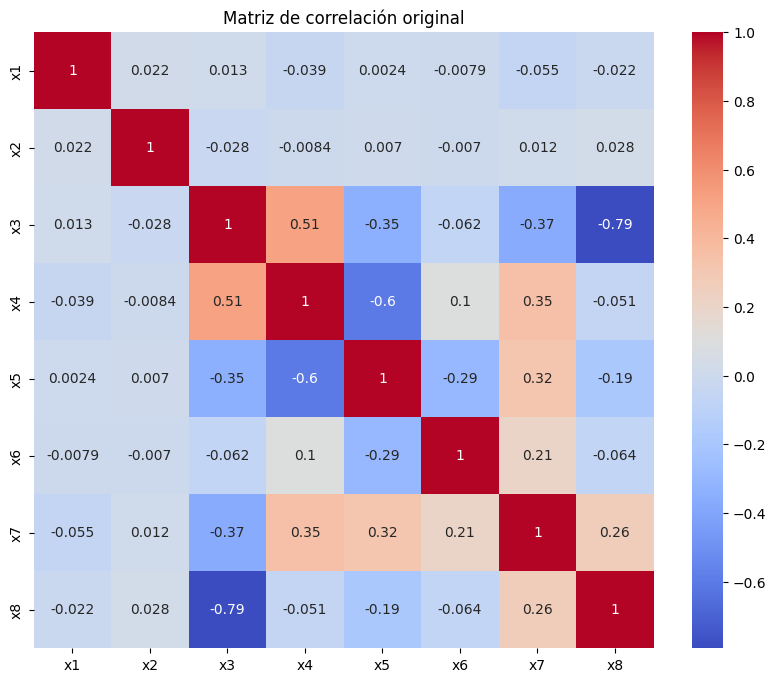

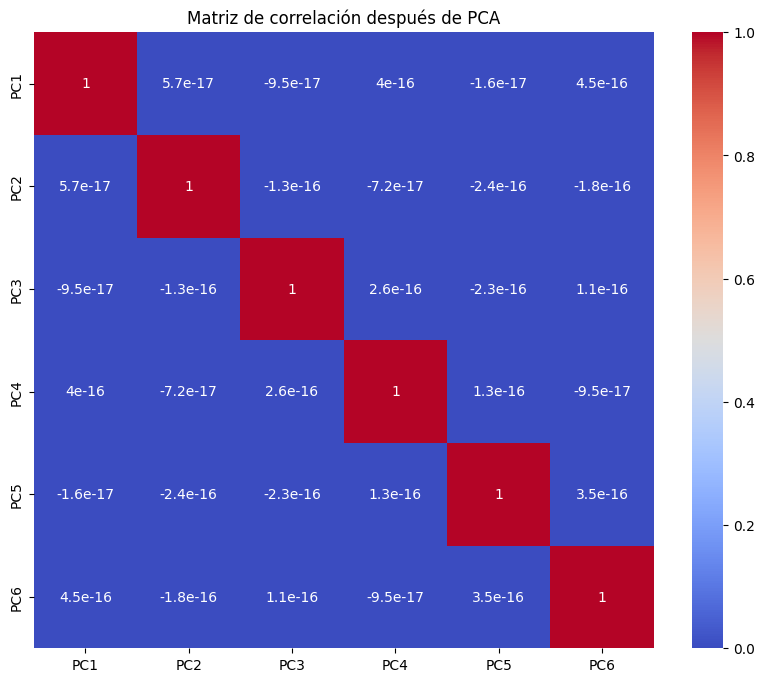

Varianza explicada por cada componente PCA:
[0.411 0.215 0.147 0.127 0.053 0.048]


In [7]:
from sklearn.decomposition import PCA

# --- Matriz de correlación original ---
plt.figure(figsize=(10,8))
sns.heatmap(df.drop('y', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de correlación original")
plt.show()

# --- Aplicar PCA para reducir correlación ---
pca = PCA(n_components=6)
X_pca = pca.fit_transform(df.drop('y', axis=1))
df_pca = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(6)])
df_pca['y'] = df['y']

# --- Nueva matriz de correlación ---
plt.figure(figsize=(10,8))
sns.heatmap(df_pca.drop('y', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de correlación después de PCA")
plt.show()

print("Varianza explicada por cada componente PCA:")
print(np.round(pca.explained_variance_ratio_, 3))

La matriz de correlaciones (ver Ilustración 3), muestra relaciones tanto positivas como negativas entre las variables. Se pueden destacar la correlación positiva entre x3 y x4 (r = 0.51) y la correlación negativa entre x3 y x 8 (r = -0.79), las variables x1, x2 y x6 muestran baja relación con las demás brindando más información de manera individual. Por esto se realiza un método de reducción de dimensionalidad PCA para disminuir la correlación entre variables.

#2. Transformación de escalas: sin escalar vs escalado (StandardScaler)

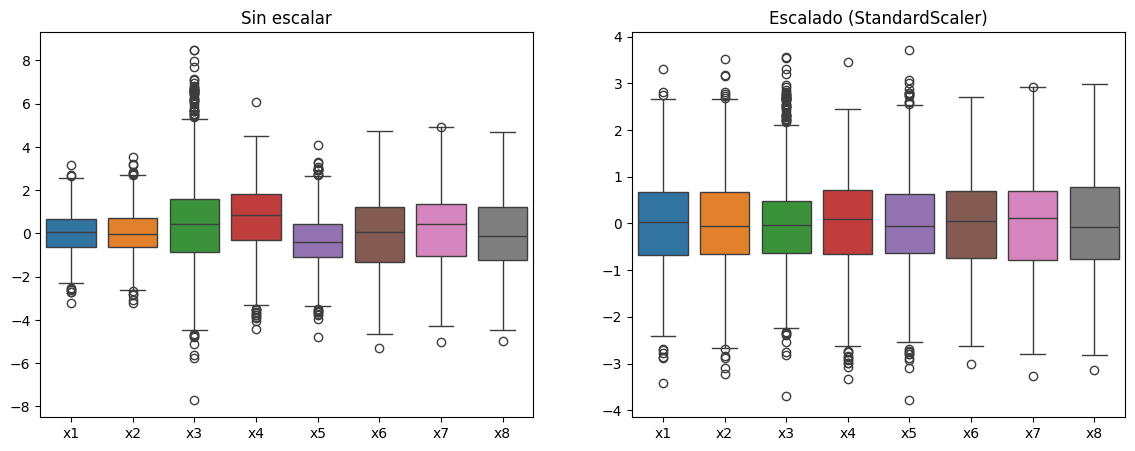

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('y', axis=1))
df_scaled = pd.DataFrame(X_scaled, columns=[f"x{i+1}" for i in range(X.shape[1])])
df_scaled['y'] = df['y']

# Comparación de distribuciones antes y después del escalado
fig, axes = plt.subplots(1, 2, figsize=(14,5))
sns.boxplot(data=df.drop('y',axis=1), ax=axes[0])
axes[0].set_title("Sin escalar")
sns.boxplot(data=df_scaled.drop('y',axis=1), ax=axes[1])
axes[1].set_title("Escalado (StandardScaler)")
plt.show()


En la ilustración 4 se observa la comparación de la distribución de las variables antes y después de aplicar la estandarización mediante StandardScaler.
En la parte izquierda “Sin escalar”, las variables presentan diferentes rangos y medias, lo que indica desbalance en las magnitudes y puede afectar modelos sensibles a la escala, como kNN o SVM.
En la parte derecha “Escalado”, las variables se centran en torno a la media 0 y tienen desviación estándar unitaria cerca de 1. Esto estandariza las dimensiones del espacio de características, reduciendo la dominancia de aquellas con mayor varianza.


#3. Efecto de la normalización en la forma de los datos (MinMaxScaler)

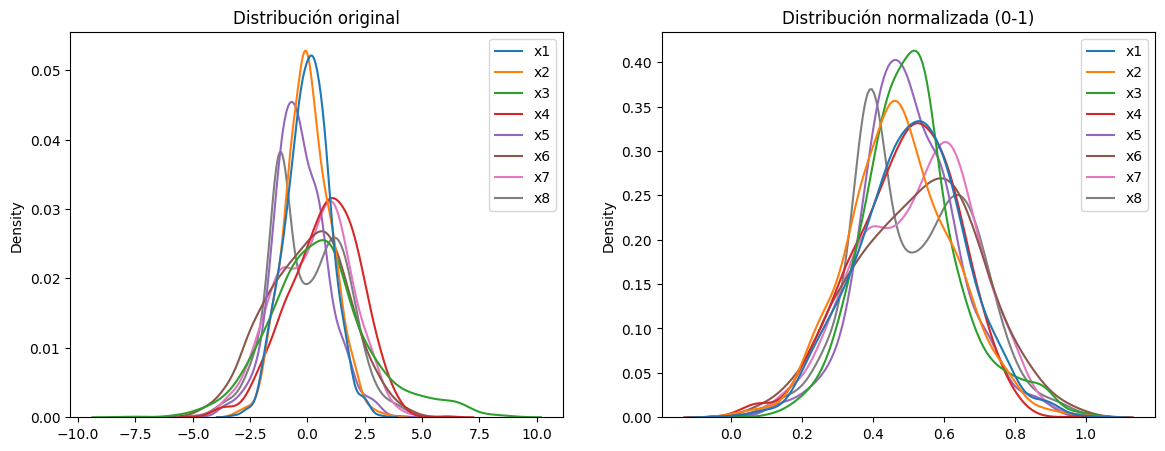

In [ ]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
X_norm = minmax.fit_transform(df.drop('y', axis=1))
df_norm = pd.DataFrame(X_norm, columns=[f"x{i+1}" for i in range(X.shape[1])])
df_norm['y'] = df['y']

# Comparación visual de distribuciones
fig, axes = plt.subplots(1, 2, figsize=(14,5))
sns.kdeplot(data=df.drop('y',axis=1), ax=axes[0])
axes[0].set_title("Distribución original")
sns.kdeplot(data=df_norm.drop('y',axis=1), ax=axes[1])
axes[1].set_title("Distribución normalizada (0-1)")
plt.show()


La normalización con MinMaxScaler ajusta todas las variables al rango [0, 1], manteniendo su forma original pero reduciendo diferencias de escala. Esto permite que todas las variables aporten de manera equilibrada al modelo, evitando que unas dominen sobre otras en algoritmos sensibles a la magnitud, como kNN o SVM.

#KNN datos originales

In [ ]:
X = df.drop('y', axis=1)
y = df['y']

Dividir el dataset

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Entrenar el modelo

🔹 Resultados KNN sin escalar:
Exactitud (accuracy): 0.88


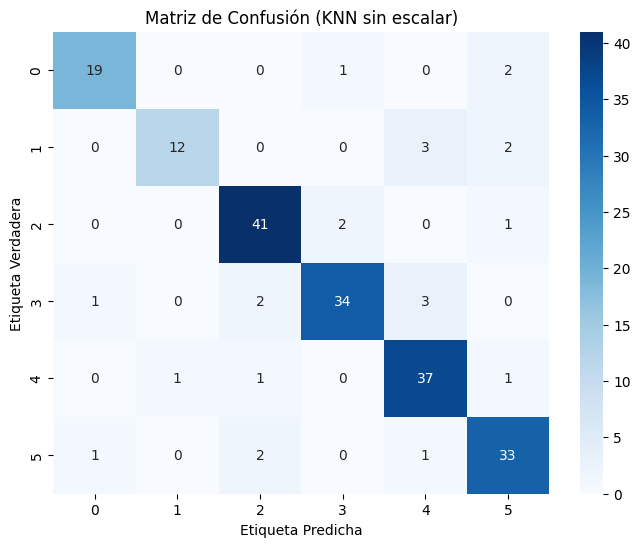


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        22
           1       0.92      0.71      0.80        17
           2       0.89      0.93      0.91        44
           3       0.92      0.85      0.88        40
           4       0.84      0.93      0.88        40
           5       0.85      0.89      0.87        37

    accuracy                           0.88       200
   macro avg       0.89      0.86      0.87       200
weighted avg       0.88      0.88      0.88       200



In [ ]:
knn_raw = KNeighborsClassifier(n_neighbors=5)
knn_raw.fit(x_train, y_train)
y_pred_raw = knn_raw.predict(x_test)

print("🔹 Resultados KNN sin escalar:")
print("Exactitud (accuracy):", round(accuracy_score(y_test, y_pred_raw), 3))
cm = confusion_matrix(y_test, y_pred_raw)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión (KNN sin escalar)')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_raw))

# KNN Datos escalizados

🔹 Resultados KNN con datos escalados:
Exactitud (accuracy): 0.855


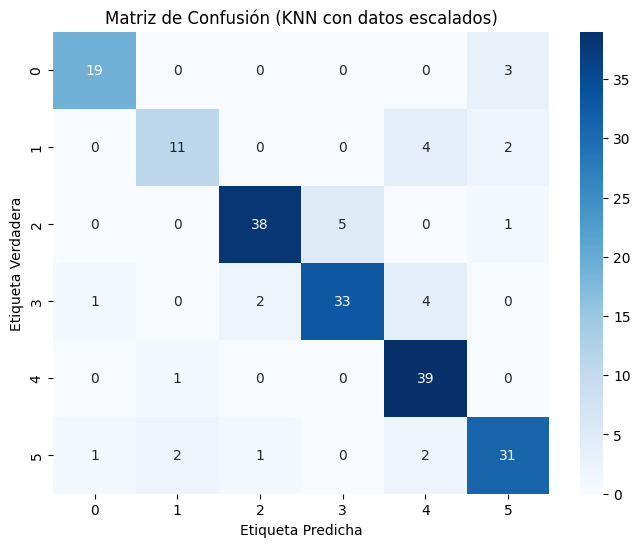


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        22
           1       0.79      0.65      0.71        17
           2       0.93      0.86      0.89        44
           3       0.87      0.82      0.85        40
           4       0.80      0.97      0.88        40
           5       0.84      0.84      0.84        37

    accuracy                           0.85       200
   macro avg       0.85      0.84      0.84       200
weighted avg       0.86      0.85      0.85       200



In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

print("🔹 Resultados KNN con datos escalados:")
print("Exactitud (accuracy):", round(accuracy_score(y_test, y_pred_scaled), 3))

cm_scaled = confusion_matrix(y_test, y_pred_scaled)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_scaled, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión (KNN con datos escalados)')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_scaled))

#KNN con datos que tengan pca

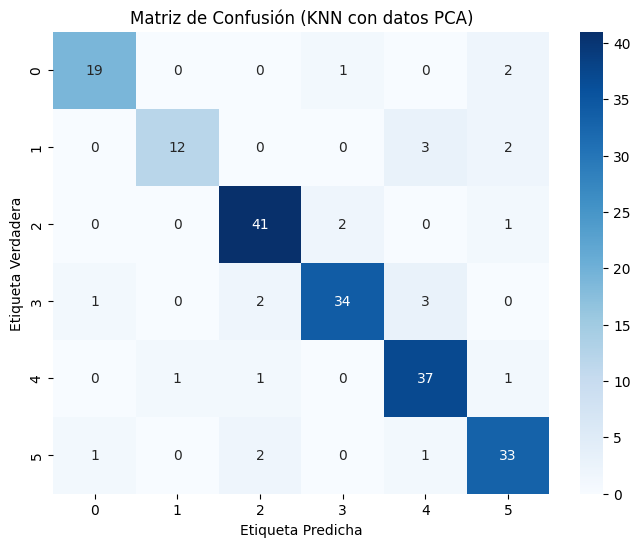

🔹 Resultados KNN con datos PCA:
Exactitud (accuracy): 0.88

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        22
           1       0.92      0.71      0.80        17
           2       0.89      0.93      0.91        44
           3       0.92      0.85      0.88        40
           4       0.84      0.93      0.88        40
           5       0.85      0.89      0.87        37

    accuracy                           0.88       200
   macro avg       0.89      0.86      0.87       200
weighted avg       0.88      0.88      0.88       200



In [ ]:
# Split PCA-transformed data
X_pca = df_pca.drop('y', axis=1)
y_pca = df_pca['y']
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.2, random_state=0)

# Train KNN model on PCA data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(x_train_pca, y_train_pca)
y_pred_pca = knn_pca.predict(x_test_pca)

# Calculate and display confusion matrix
cm_pca = confusion_matrix(y_test_pca, y_pred_pca)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_pca, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión (KNN con datos PCA)')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()

print("🔹 Resultados KNN con datos PCA:")
print("Exactitud (accuracy):", round(accuracy_score(y_test_pca, y_pred_pca), 3))
print("\nReporte de clasificación:")
print(classification_report(y_test_pca, y_pred_pca))

#KNN con los datos normalizados

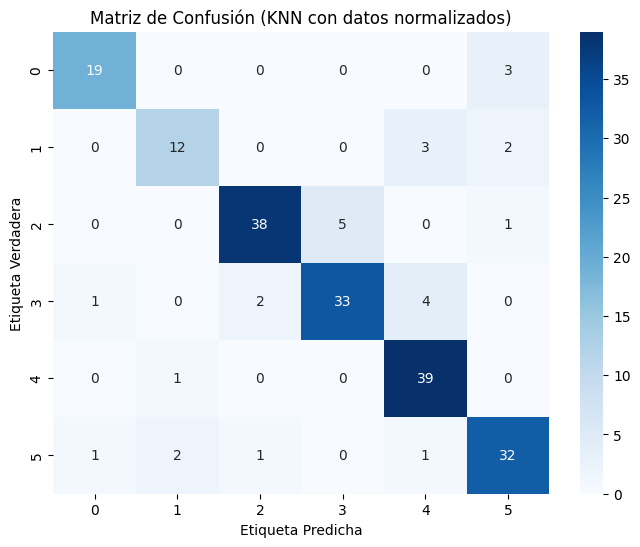

🔹 Resultados KNN con datos normalizados:
Exactitud (accuracy): 0.865

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        22
           1       0.80      0.71      0.75        17
           2       0.93      0.86      0.89        44
           3       0.87      0.82      0.85        40
           4       0.83      0.97      0.90        40
           5       0.84      0.86      0.85        37

    accuracy                           0.86       200
   macro avg       0.86      0.85      0.85       200
weighted avg       0.87      0.86      0.86       200



In [ ]:
# Split normalized data
X_norm = df_norm.drop('y', axis=1)
y_norm = df_norm['y']
x_train_norm, x_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y_norm, test_size=0.2, random_state=0)

# Train KNN model on normalized data
knn_norm = KNeighborsClassifier(n_neighbors=5)
knn_norm.fit(x_train_norm, y_train_norm)
y_pred_norm = knn_norm.predict(x_test_norm)

# Calculate and display confusion matrix
cm_norm = confusion_matrix(y_test_norm, y_pred_norm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_norm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión (KNN con datos normalizados)')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()

print("🔹 Resultados KNN con datos normalizados:")
print("Exactitud (accuracy):", round(accuracy_score(y_test_norm, y_pred_norm), 3))
print("\nReporte de clasificación:")
print(classification_report(y_test_norm, y_pred_norm))

Según la Tabla 2 el mejor modelo es el KNN con PCA ya que mantiene el mismo nivel de precisión (0.88) que los datos originales, pero con una estructura más eficiente y simplificada gracias a la reducción de dimensionalidad. Esta es la opción más recomendable porque combina alto rendimiento y menor complejidad computacional.
Estos resultados se deben a que PCA y los datos originales mantienen la estructura interna de los datos y las relaciones naturales entre las variables, mientras que el escalado y la normalización modifican esas relaciones, afectando como el modelo mide la similitud entre observaciones.
